In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns',None)


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [3]:
pow=pd.read_csv('super_hero_powers.csv')
info=pd.read_csv('heroes_information.csv',index_col=0)

In [4]:
pow

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [5]:
info

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [6]:
pow.shape,info.shape

((667, 168), (734, 10))

In [7]:
df=pd.merge(pow,info,left_on='hero_names',right_on='name',how='inner')

In [8]:
df.Height[df.Height<0]=np.nan
df.Weight[df.Weight<0]=np.nan

<ipython-input-8-1bad90ae7715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Height[df.Height<0]=np.nan
<ipython-input-8-1bad90ae7715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Weight[df.Weight<0]=np.nan


In [9]:
df=df.drop('name',axis=1).set_index('hero_names')

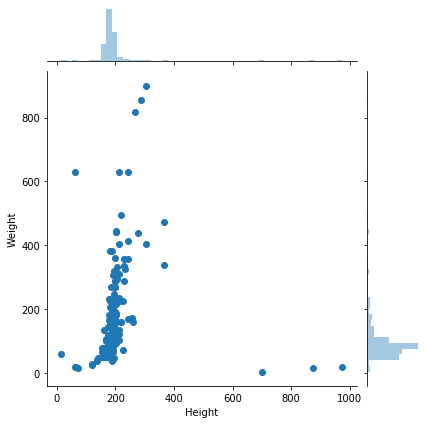

In [10]:
sb.jointplot(x=df.Height,y=df.Weight)

In [11]:
df.Height.isna().mean(),df.Weight.isna().mean()

(0.25757575757575757, 0.2909090909090909)

Iremos desconsiderar estas variáveis por possuir muitos valores vazios.

In [12]:
df.Gender.value_counts(dropna=False)

Male      464
Female    178
-          18
Name: Gender, dtype: int64

In [13]:
df['Male']=df['Gender']=='Male'
df['Female']=df['Gender']=='Female'

In [14]:
df['Eye color'].value_counts(dropna=False,normalize=True)#blue,br(own),green,red,black,yellow

blue                       0.315152
-                          0.198485
brown                      0.180303
green                      0.107576
red                        0.065152
black                      0.031818
yellow                     0.028788
white                      0.024242
hazel                      0.009091
grey                       0.007576
purple                     0.006061
gold                       0.004545
yellow (without irises)    0.003030
amber                      0.003030
violet                     0.003030
yellow / red               0.001515
bown                       0.001515
indigo                     0.001515
blue / white               0.001515
white / red                0.001515
yellow / blue              0.001515
silver                     0.001515
green / blue               0.001515
Name: Eye color, dtype: float64

In [15]:
df['Eye_Blue']=df['Eye color'].str.contains('blue')
df['Eye_Brown']=df['Eye color'].str.contains('own')
df['Eye_Green']=df['Eye color'].str.contains('green')
df['Eye_Black']=df['Eye color'].str.contains('black')
df['Eye_Red']=df['Eye color'].str.contains('red')
df['Eye_None']=df['Eye color']=='-'

In [16]:
df.Race.value_counts(normalize=True).head()#Human or mutant

-                    0.374242
Human                0.295455
Mutant               0.093939
God / Eternal        0.021212
Human / Radiation    0.016667
Name: Race, dtype: float64

In [17]:
df['Race_Human']=df['Race']=='Human'
df['Race_Mutant']=df['Race']=='Mutant'

In [18]:
df['Hair color'].value_counts(normalize=True)#Black,blond,brown,no hair, red

Black               0.228788
-                   0.200000
Blond               0.133333
Brown               0.124242
No Hair             0.104545
Red                 0.074242
White               0.033333
Auburn              0.019697
Green               0.012121
Strawberry Blond    0.009091
Purple              0.007576
Silver              0.006061
Brown / White       0.006061
Grey                0.006061
black               0.004545
Blue                0.004545
blond               0.004545
Orange              0.003030
Red / White         0.001515
Pink                0.001515
Magenta             0.001515
Yellow              0.001515
Gold                0.001515
Black / Blue        0.001515
Indigo              0.001515
Red / Orange        0.001515
Brown / Black       0.001515
Brownn              0.001515
Orange / White      0.001515
Red / Grey          0.001515
Name: Hair color, dtype: float64

In [19]:
df['Hair color']=df['Hair color'].str.lower()

In [20]:
df['Hair_Black']=df['Hair color'].str.contains('lack')
df['Hair_Blond']=df['Hair color'].str.contains('lond')
df['Hair_Brown']=df['Hair color'].str.contains('rown')
df['Hair_Red']=df['Hair color'].str.contains('red')
df['Hair_Bald']=df['Hair color'].str.contains('no hair')

In [21]:
df['Publisher'].value_counts().head()# marvel, DC

Marvel Comics        341
DC Comics            196
NBC - Heroes          18
Dark Horse Comics     18
Image Comics          14
Name: Publisher, dtype: int64

In [22]:
df['Marvel']=df['Publisher']=='Marvel Comics'
df['DC']=df['Publisher']=='DC Comics'

In [23]:
df['Skin color'].value_counts().head()

-        588
green     21
blue       9
red        9
white      7
Name: Skin color, dtype: int64

In [24]:
df['Skin_Normal']=df['Skin color']=='-'

In [25]:
df.Alignment.replace('-','neutral',inplace=True)

In [26]:
df['Good']=df.Alignment=='good'
df['Bad']=df.Alignment=='bad'

In [27]:
df.dtypes=='bool'

Agility                  True
Accelerated Healing      True
Lantern Power Ring       True
Dimensional Awareness    True
Cold Resistance          True
                         ... 
Marvel                   True
DC                       True
Skin_Normal              True
Good                     True
Bad                      True
Length: 196, dtype: bool

In [28]:
df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Male,Female,Eye_Blue,Eye_Brown,Eye_Green,Eye_Black,Eye_Red,Eye_None,Race_Human,Race_Mutant,Hair_Black,Hair_Blond,Hair_Brown,Hair_Red,Hair_Bald,Marvel,DC,Skin_Normal,Good,Bad
hero_names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,yellow,Human,no hair,203.0,Marvel Comics,-,good,441.0,True,False,False,False,False,Fals

In [29]:
df.columns.shape

(196,)

In [30]:
df.columns[df.dtypes=='bool'].shape

(187,)

In [31]:
X=df[df.columns[df.dtypes=='bool']]

# PCA

In [32]:
import sklearn.decomposition as skde

In [33]:
pca=skde.PCA()

In [34]:
pca.fit(X)

PCA()

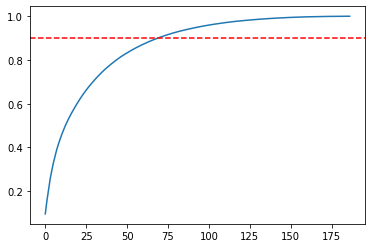

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.90,linestyle='--',color='r')

In [36]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.90)[0][0]

69

In [37]:
Xt=skde.PCA(n_components=69).fit_transform(X)

# Agrupamento de superpoderes

Como os poderes são muitos e os campos estão booleanos, faz sentido tentar usar a distância Manhattan. No caso, aplicar a distância de Manhattan dá na mesma. 

In [38]:
import sklearn.cluster as skcl
import sklearn.preprocessing as skpp
import sklearn.metrics as metrics
import yellowbrick.cluster as ybc

In [39]:
from scipy.cluster.hierarchy import dendrogram

In [40]:
hie=skcl.AgglomerativeClustering(distance_threshold=0,n_clusters=None)

In [41]:
hie.fit(Xt)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

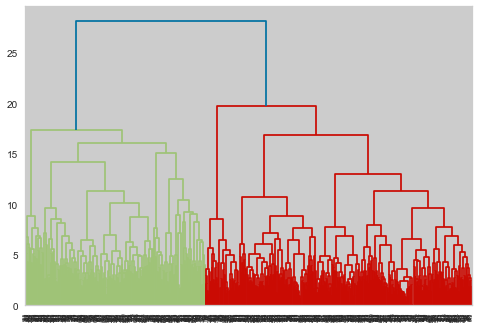

In [42]:
plot_dendrogram(hie,truncate_mode='level')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000019882279C70>,
                 estimator=AgglomerativeClustering(n_clusters=30), k=None)

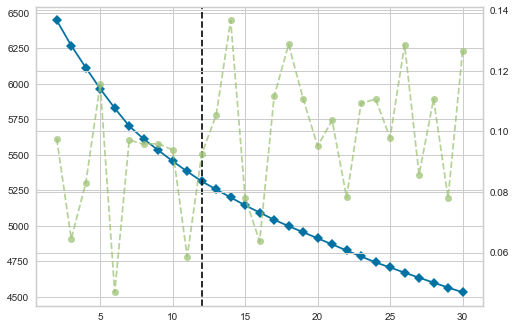

In [43]:
hie=skcl.AgglomerativeClustering()
e_hie=ybc.KElbow(hie,k=30)
e_hie.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001988241DFD0>,
                 estimator=AgglomerativeClustering(n_clusters=30), k=None)

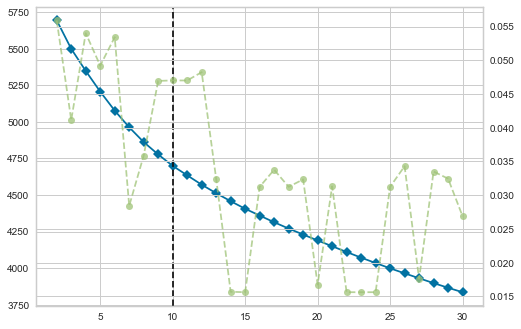

In [44]:
hie=skcl.AgglomerativeClustering()
e_hie=ybc.KElbow(hie,k=30)
e_hie.fit(Xt)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000198824AF100>,
                 estimator=KMeans(n_clusters=40), k=None)

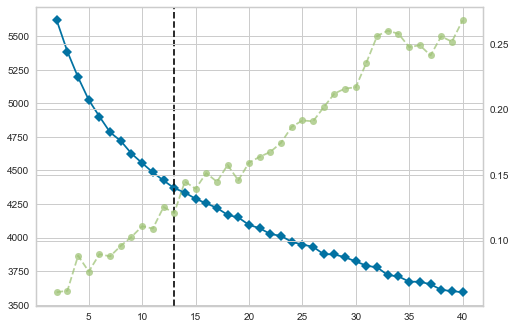

In [45]:
km=skcl.KMeans()
e_hie=ybc.KElbow(km,k=40)
e_hie.fit(Xt)

In [46]:
km=skcl.KMeans(n_clusters=4)

In [47]:
km.fit(Xt)

KMeans(n_clusters=4)

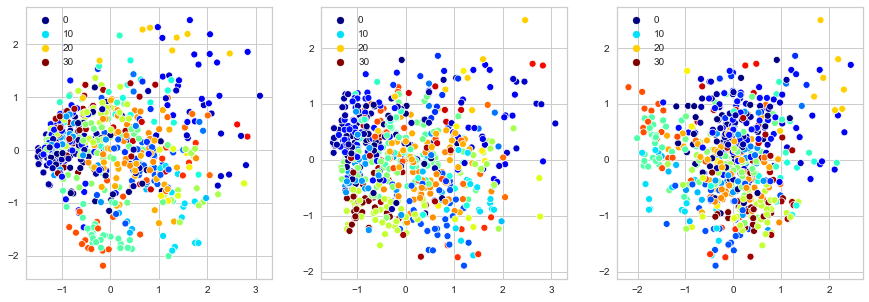

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sb.scatterplot(Xt[:,0],Xt[:,1],hue=hie.labels_,palette='jet')
plt.subplot(132)
sb.scatterplot(Xt[:,0],Xt[:,2],hue=hie.labels_,palette='jet')
plt.subplot(133)
sb.scatterplot(Xt[:,1],Xt[:,2],hue=hie.labels_,palette='jet')

In [49]:
hie=skcl.AgglomerativeClustering(n_clusters=4)

In [50]:
hie.fit(Xt)

AgglomerativeClustering(n_clusters=4)

Text(0, 0.5, 'PCA3')

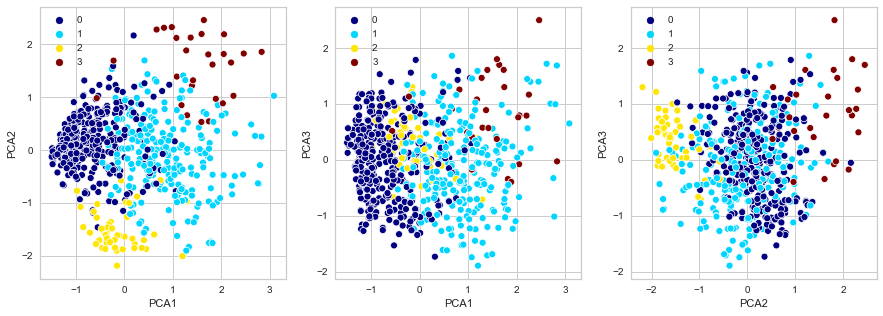

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.xlabel('PCA1');plt.ylabel('PCA2');
sb.scatterplot(Xt[:,0],Xt[:,1],hue=hie.labels_,palette='jet')
plt.subplot(132)
plt.xlabel('PCA1');plt.ylabel('PCA3');
sb.scatterplot(Xt[:,0],Xt[:,2],hue=hie.labels_,palette='jet')
plt.subplot(133)
sb.scatterplot(Xt[:,1],Xt[:,2],hue=hie.labels_,palette='jet')
plt.xlabel('PCA2');plt.ylabel('PCA3')

# Questão 1:
Optei pela clusterização hierárquica. Como os dados eram praticamente 100% booleanos, não me pareceu fazer sentido um K-means. A clusterização hierárquica me pareceu mais natural, o que correspondeu graficamente.<br>
Realizei o pré-processamento juntando as tabelas, criando colunas via one hot encoding, eliminando colunas numéricas devido aos valores faltantes e aplicando decomposição PCA. De frameworks, usei Yellowbricks com regra do cotovelo e  dendrograma para verificar o melhor número de clusteres.

# Questão 2
Pelo método do cotovelo, não foi trivial encontrar um número de clusteres seja para a clusterização hierárquica, seja para o KMeans. A escolha do número de clusteres foi feita unicamente pelo dendograma, que pareceu fazer sentido com 4 grupos.

# Aprendizado supervisionado

In [52]:
import sklearn.model_selection as skms
from sklearn.naive_bayes import BernoulliNB as nb
import scikitplot as skplt

In [53]:
y=X['Bad']

X=X.drop(['Good','Bad'],axis=1)

In [54]:
y=y.loc[df['Alignment'].isin(['good','bad'])]
X=X.loc[df['Alignment'].isin(['good','bad'])]

In [55]:
Xtrain,Xtest,ytrain,ytest=skms.train_test_split(X,y,shuffle=True,random_state=42)

In [56]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((471, 185), (158, 185), (471,), (158,))

## Naïve Bayes 

In [57]:
nb1=nb().fit(X=Xtrain,y=ytrain)

In [58]:
pred=nb1.predict(Xtest)
prob=nb1.predict_proba(Xtest)

In [59]:
plt.rcParams["axes.grid"] = False

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


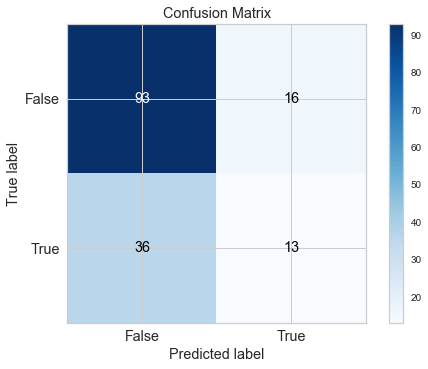

In [60]:
skplt.plotters.plot_confusion_matrix(ytest,pred,text_fontsize='large')

In [61]:
metrics.cohen_kappa_score(ytest,pred)

0.1335161358363215

Resultado OK.

## PCA + Reglog ou AdaBoost

In [62]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
pca=PCA()
pca.fit(X)

PCA()

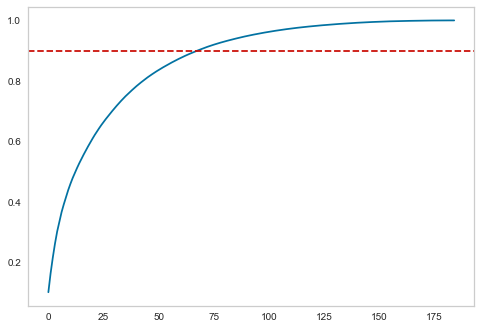

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.90,linestyle='--',color='r')

In [65]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.90)[0][0]

68

In [66]:
Xt=PCA(n_components=68).fit_transform(X)

In [67]:
Xtrain,Xtest,ytrain,ytest=skms.train_test_split(Xt,y,shuffle=True,random_state=42)

In [68]:
y.value_counts(normalize=True)

False    0.691574
True     0.308426
Name: Bad, dtype: float64

In [69]:
reglog1=LogisticRegression(class_weight={False:1,True:1})
reglog1.fit(Xtrain,ytrain)
reglog2=LogisticRegression(class_weight={False:1,True:2})
reglog2.fit(Xtrain,ytrain)

LogisticRegression(class_weight={False: 1, True: 2})

In [70]:
print(metrics.confusion_matrix(ytest,reglog1.predict(Xtest)))
print(metrics.confusion_matrix(ytest,reglog2.predict(Xtest)))

[[95 14]
 [34 15]]
[[75 34]
 [26 23]]


In [71]:
print("Peso 1")
print(metrics.classification_report(ytest,reglog1.predict(Xtest)))
print("Peso 2")
print(metrics.classification_report(ytest,reglog2.predict(Xtest)))

Peso 1
              precision    recall  f1-score   support

       False       0.74      0.87      0.80       109
        True       0.52      0.31      0.38        49

    accuracy                           0.70       158
   macro avg       0.63      0.59      0.59       158
weighted avg       0.67      0.70      0.67       158

Peso 2
              precision    recall  f1-score   support

       False       0.74      0.69      0.71       109
        True       0.40      0.47      0.43        49

    accuracy                           0.62       158
   macro avg       0.57      0.58      0.57       158
weighted avg       0.64      0.62      0.63       158



In [72]:
rf1=RandomForestClassifier(class_weight={False:1,True:1})
rf1.fit(Xtrain,ytrain)
rf2=RandomForestClassifier(class_weight={False:1,True:2})
rf2.fit(Xtrain,ytrain)
rf3=RandomForestClassifier(class_weight={False:1,True:3})
rf3.fit(Xtrain,ytrain)

RandomForestClassifier(class_weight={False: 1, True: 3})

In [73]:
print(metrics.confusion_matrix(ytest,rf1.predict(Xtest)))
print(metrics.confusion_matrix(ytest,rf2.predict(Xtest)))
print(metrics.confusion_matrix(ytest,rf3.predict(Xtest)))

[[106   3]
 [ 48   1]]
[[107   2]
 [ 48   1]]
[[106   3]
 [ 48   1]]


In [74]:
ada1=AdaBoostClassifier(DecisionTreeClassifier(class_weight={False:1,True:1}))
ada1.fit(Xtrain,ytrain)
ada2=AdaBoostClassifier(DecisionTreeClassifier(class_weight={False:1,True:2}))
ada2.fit(Xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={False: 1,
                                                                       True: 2}))

In [75]:
print(metrics.confusion_matrix(ytest,ada1.predict(Xtest)))
print(metrics.confusion_matrix(ytest,ada2.predict(Xtest)))

[[73 36]
 [35 14]]
[[76 33]
 [33 16]]


In [76]:
print("Peso 1")
print(metrics.classification_report(ytest,ada1.predict(Xtest)))
print("Peso 2")
print(metrics.classification_report(ytest,ada2.predict(Xtest)))

Peso 1
              precision    recall  f1-score   support

       False       0.68      0.67      0.67       109
        True       0.28      0.29      0.28        49

    accuracy                           0.55       158
   macro avg       0.48      0.48      0.48       158
weighted avg       0.55      0.55      0.55       158

Peso 2
              precision    recall  f1-score   support

       False       0.70      0.70      0.70       109
        True       0.33      0.33      0.33        49

    accuracy                           0.58       158
   macro avg       0.51      0.51      0.51       158
weighted avg       0.58      0.58      0.58       158



### Resultado:
Regressão Logística pareceu o mais promissor  

In [77]:
print(f'Regressão Logística kappa: {metrics.cohen_kappa_score(ytest,reglog1.predict(Xtest))}')
print(f'AdaBoost kappa: {metrics.cohen_kappa_score(ytest,ada2.predict(Xtest))}')
print(f'Naïve Bayes kappa: {metrics.cohen_kappa_score(ytest,pred)}')

Regressão Logística kappa: 0.2001687407719891
AdaBoost kappa: 0.023778318666916376
Naïve Bayes kappa: 0.1335161358363215


In [78]:
print("Matriz de confusão (Regressão Logística)")
print(metrics.confusion_matrix(ytest,reglog1.predict(Xtest)))
print("Matriz de confusão (Naïve Bayes)")
print(metrics.confusion_matrix(ytest,pred))

Matriz de confusão (Regressão Logística)
[[95 14]
 [34 15]]
Matriz de confusão (Naïve Bayes)
[[93 16]
 [36 13]]


# Regressão

In [79]:
import sklearn.linear_model as sklm
import sklearn.svm as svm
import sklearn.neural_network as sknn

In [80]:
y=df['Weight']

In [81]:
X=df[np.concatenate((df.columns[df.dtypes=='bool'],['Height']))]

In [82]:
X=X.loc[y.notna()]
y=y.dropna()

In [83]:
X.Height.fillna(X.Height.median(),inplace=True)

In [84]:
sqrtH=np.sqrt(X.Height)

In [85]:
Max,Min=X.Height.max(),X.Height.min()
sMax,sMin=sqrtH.max(),sqrtH.min()

In [86]:
X.Height=(X.Height-Min)/(Max-Min)
sqrtH=(sqrtH-sMin)/(sMax-sMin)

In [87]:
pca=PCA(n_components=70)
pca.fit(X.drop('Height',axis=1))

PCA(n_components=70)

In [88]:
Xt=pca.transform(X.drop('Height',axis=1))

In [89]:
Xt=np.column_stack((Xt,X.Height,sqrtH))

In [90]:
Xtrain,Xtest,ytrain,ytest=skms.train_test_split(Xt,y,shuffle=True,random_state=42)

In [91]:
lm1=sklm.LinearRegression()
lm1.fit(Xtrain,ytrain)

svm1=svm.LinearSVR()
svm1.fit(Xtrain,ytrain)
svm2=svm.SVR(kernel='poly',degree=2)
svm2.fit(Xtrain,ytrain)
svm3=svm.SVR(kernel='rbf')
svm3.fit(Xtrain,ytrain)

nn=sknn.MLPRegressor(hidden_layer_sizes=(128,64,32))
nn.fit(Xtrain,ytrain)

lasso=sklm.Lasso()
lasso.fit(Xtrain,ytrain)

ridge=sklm.Ridge()
ridge.fit(Xtrain,ytrain)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ridge()

In [151]:
def alike_plot(model,lim=(0,500),text='Regressão Linear'):
    fig,ax=plt.subplots()
    sb.scatterplot(ytest,model.predict(Xtest).reshape(-1))
    plt.title(text)
    ax.plot(lim,lim,alpha=0.4,color='r',linestyle='--')
    ax.text(lim[0],lim[1]*0.9,f'R²:{metrics.r2_score(ytest,model.predict(Xtest))}')
    return(ax)

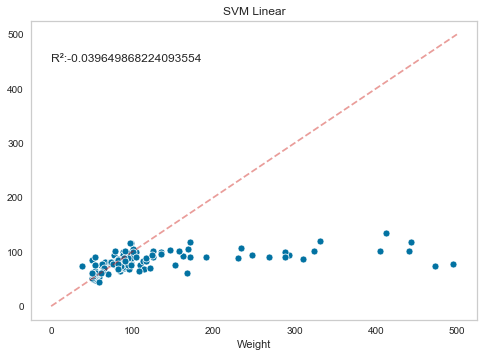

In [93]:
alike_plot(svm1,text='SVM Linear')

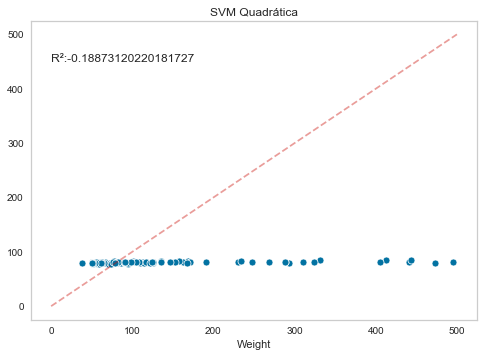

In [94]:
alike_plot(svm2,text='SVM Quadrática')

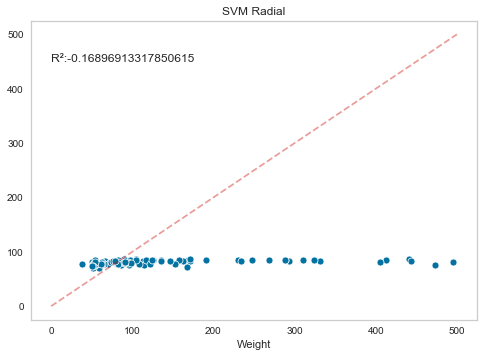

In [95]:
alike_plot(svm3,text='SVM Radial')

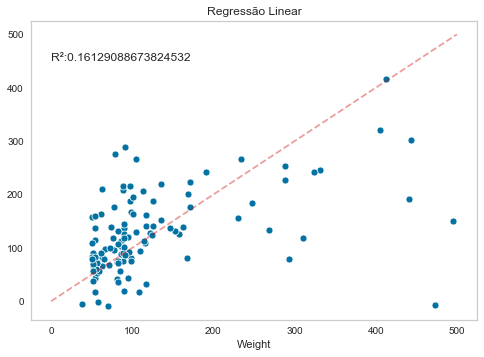

In [96]:
alike_plot(lm1)

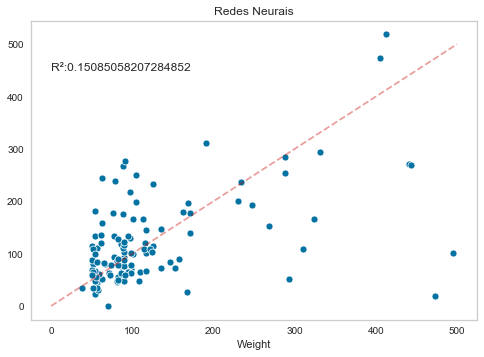

In [97]:
alike_plot(nn,text='Redes Neurais')

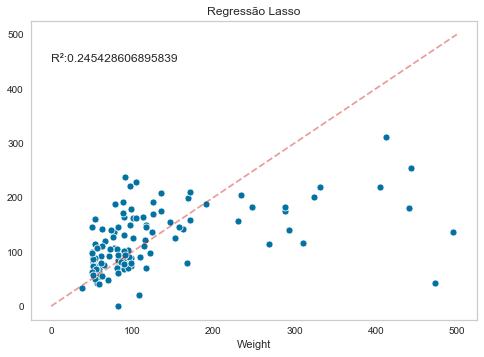

In [98]:
alike_plot(lasso,text='Regressão Lasso')

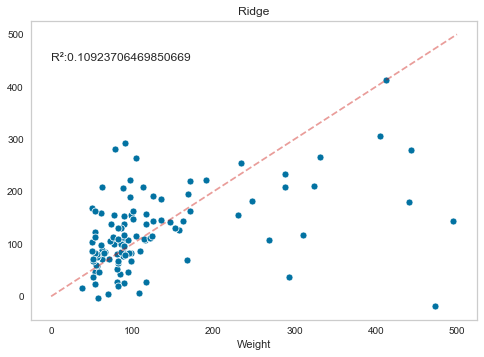

In [99]:
alike_plot(ridge,text='Ridge')

In [100]:
lasso.coef_

array([ 27.72024152, -32.69273927, -19.72605427, -12.29321859,
       -12.85794858,   0.        ,  -9.07088465,  12.82846768,
        -7.88606715,  10.45974015, -35.13716019,  -4.2635546 ,
         0.        ,  -5.08316154,  -0.        ,  -0.        ,
         0.        ,  -1.23419965,  20.05743633,  -2.82693729,
        -7.82107794, -17.71847522,  -1.28971126,  10.26014585,
        26.64228466,  12.46317714,   7.13776691,   0.        ,
        -0.        ,  24.4694888 ,  -7.05361178,  -0.        ,
        -2.40028888,   0.        ,  -0.67643162,  -0.        ,
        -0.        ,  -0.        ,  -0.        ,  28.69778182,
        -5.11079277, -31.75060243,  33.084079  ,   0.        ,
        -4.11418358,   0.        , -13.58414209,   0.        ,
         0.        ,   0.14100709,  -0.80977535,   2.69734204,
        16.42145375,   0.        ,   0.        ,   0.        ,
        -0.        ,  52.68106959,  25.58560218,  -0.        ,
         0.        ,  -0.        ,   0.        ,   0.  

A melhor regressão foi a Lasso. Isto se deve parcialmente ao fato de haver muitos personagens com pesos extremamente grandes. A penalização Lasso compensa esses valores muito elevado, permitindo que os erremos para acertarmos o todo de uma forma melhor. O resultado é um R² de 0.245, o que configura um bom resultado.

#### Só para não dizer que não falei de TensorFlow

In [101]:
import tensorflow as tf

In [109]:
X.shape

(468, 188)

In [167]:
nn2=tf.keras.Sequential(
    [
        tf.keras.Input(Xtrain.shape[1]),
        tf.keras.layers.Dense(128,kernel_regularizer='l2'),
        tf.keras.layers.Dense(64,kernel_regularizer='l1'),
        tf.keras.layers.Dense(32,kernel_regularizer='l1'),
        tf.keras.layers.Dense(1)
    ]
)

In [168]:
nn2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               9344      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 19,713
Trainable params: 19,713
Non-trainable params: 0
_________________________________________________________________


In [169]:
nn2.compile(loss='mse')

In [170]:
nn2.fit(Xtrain,ytrain,epochs=50)

Epoch 1/50
11/11 [==============================] - 1s 4ms/step - loss: 20855.7718
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 17663.5862
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 21343.6652
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 19365.2887
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 16965.7090
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 13533.2637
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 11145.8962
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 8866.7346
Epoch 9/50
11/11 [==============================] - 0s 5ms/step - loss: 7681.0607
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 7763.9493
Epoch 11/50
11/11 [==============================] - 0s 5ms/step - loss: 7189.2567
Epoch 12/50
11/11 [==============================] - 0s 5ms/step - loss: 8778.1841
Epoch 

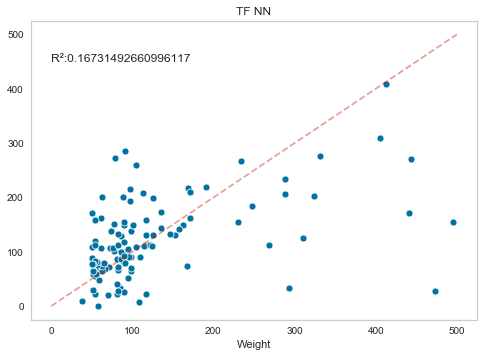

In [171]:
alike_plot(nn2,text='TF NN')